##### 1. Scrape an RGB image from a target webpage
##### Extract an image file (.png or .jpg) programmatically.
##### Save it locally .png or .jpeg based on the type of image files.

In [1]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import cv2

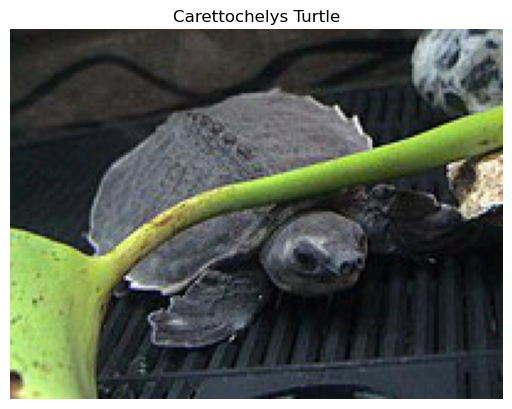

In [2]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Carettochelys_insculpta.jpg/200px-Carettochelys_insculpta.jpg"

response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
response.raise_for_status()

image = Image.open(BytesIO(response.content)).convert('RGB')

image.save("carettochelys.jpg")
plt.imshow(image)
plt.axis('off')
plt.title("Carettochelys Turtle")
plt.show()

In [3]:
img = cv2.imread("carettochelys.jpg")

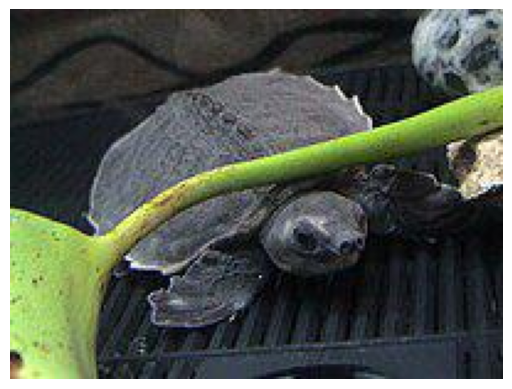

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()

##### 2. Apply Advanced Histogram Analysis
##### Display individual Red, Green, Blue histograms.
##### Create and display a combined RGB histogram on the same plot.
##### Normalize the histograms for comparison.

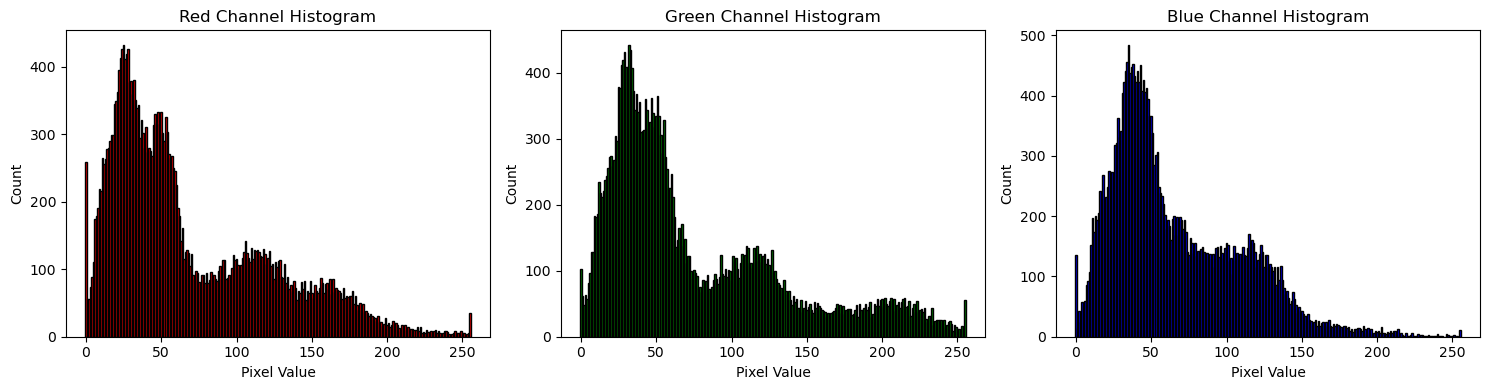

In [5]:
red = img_rgb[:, :, 0]
green = img_rgb[:, :, 1]
blue = img_rgb[:, :, 2]

r_hist, _ = np.histogram(red, bins=256, range=(0, 256))
g_hist, _ = np.histogram(green, bins=256, range=(0, 256))
b_hist, _ = np.histogram(blue, bins=256, range=(0, 256))

bins = np.arange(256)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.bar(bins, r_hist, color='red', edgecolor='black', width=1)
plt.title("Red Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.bar(bins, g_hist, color='green', edgecolor='black', width=1)
plt.title("Green Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
plt.bar(bins, b_hist, color='blue', edgecolor='black', width=1)
plt.title("Blue Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

##### Display individual Red, Green, Blue histograms.

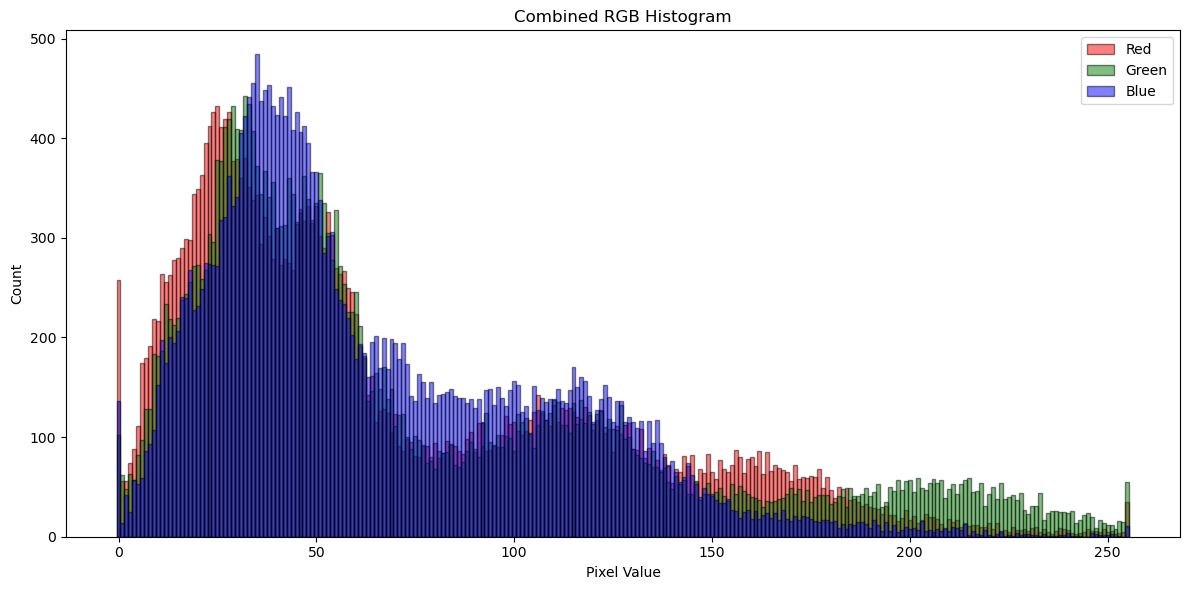

In [6]:
if img is None:
    raise FileNotFoundError("Image not found!")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = img_rgb[:, :, 0]
green = img_rgb[:, :, 1]
blue = img_rgb[:, :, 2]

r_hist, _ = np.histogram(red, bins=256, range=(0, 256))
g_hist, _ = np.histogram(green, bins=256, range=(0, 256))
b_hist, _ = np.histogram(blue, bins=256, range=(0, 256))
bins = np.arange(256)

plt.figure(figsize=(12, 6))
plt.bar(bins, r_hist, color='red', alpha=0.5, label='Red', edgecolor='black', width=1)
plt.bar(bins, g_hist, color='green', alpha=0.5, label='Green', edgecolor='black', width=1)
plt.bar(bins, b_hist, color='blue', alpha=0.5, label='Blue', edgecolor='black', width=1)

plt.title("Combined RGB Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

##### Create and display a combined RGB histogram on the same plot.

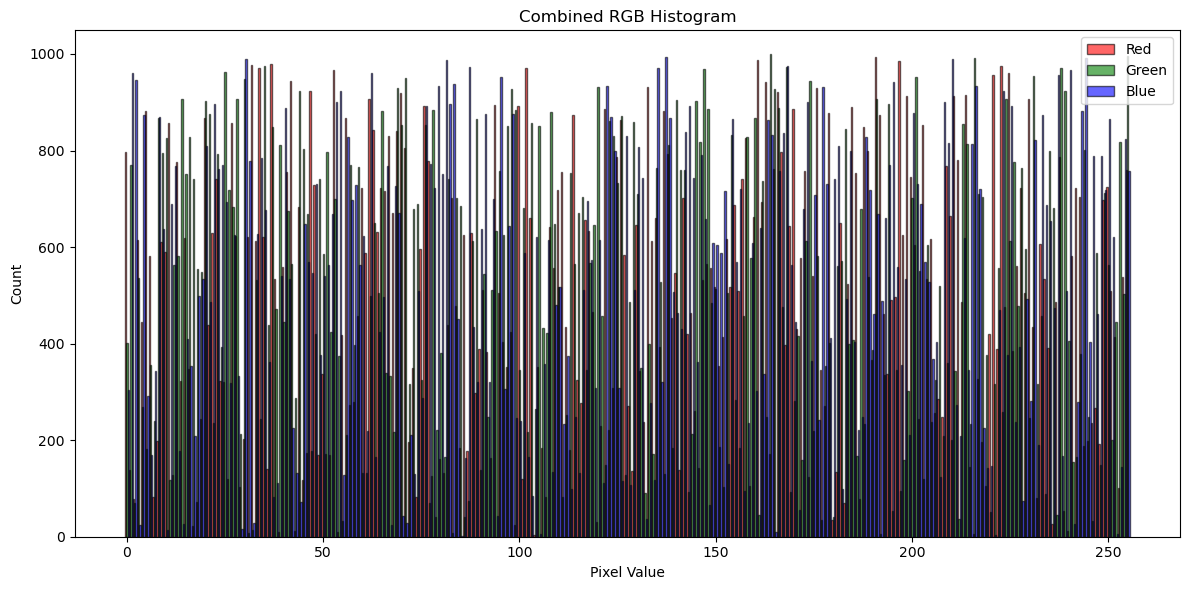

In [7]:
bins = np.arange(256)        
r_hist = np.random.randint(0, 1000, size=256)
g_hist = np.random.randint(0, 1000, size=256)
b_hist = np.random.randint(0, 1000, size=256)

plt.figure(figsize=(12, 6))
width = 1  # bar width

plt.bar(bins - width/3, r_hist, color='red', alpha=0.6, label='Red', edgecolor='black', width=width/3)
plt.bar(bins, g_hist, color='green', alpha=0.6, label='Green', edgecolor='black', width=width/3)
plt.bar(bins + width/3, b_hist, color='blue', alpha=0.6, label='Blue', edgecolor='black', width=width/3)

plt.title("Combined RGB Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

##### Normalize histograms for comparison


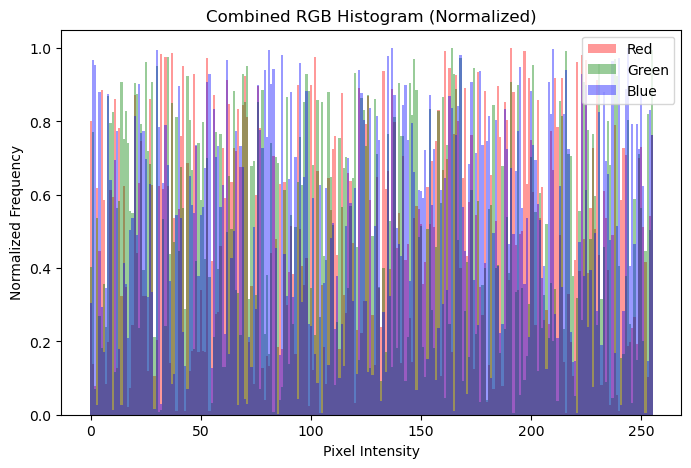

In [8]:
r_hist_norm = r_hist / r_hist.max()
g_hist_norm = g_hist / g_hist.max()
b_hist_norm = b_hist / b_hist.max()

pixel_values = np.arange(256)  # 0 to 255

plt.figure(figsize=(8, 5))
plt.bar(pixel_values, r_hist_norm, color='red', alpha=0.4, label='Red', width=1)
plt.bar(pixel_values, g_hist_norm, color='green', alpha=0.4, label='Green', width=1)
plt.bar(pixel_values, b_hist_norm, color='blue', alpha=0.4, label='Blue', width=1)
plt.title("Combined RGB Histogram (Normalized)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Normalized Frequency")
plt.legend()
plt.show()

##### Logarithmic Transformation for contrast enhancement in dark regions.

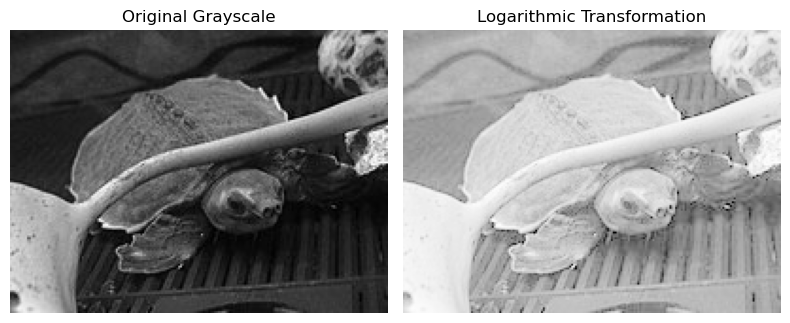

In [9]:
gray_image = np.array(image.convert('L'))

c = 255 / np.log(1 + np.max(gray_image))
log_transformed = c * np.log(1 + gray_image)
log_transformed = np.array(log_transformed, dtype=np.uint8)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(log_transformed, cmap='gray')
plt.title("Logarithmic Transformation")
plt.axis('off')

plt.tight_layout()
plt.show()

##### Gamma Correction with at least two different gamma values.

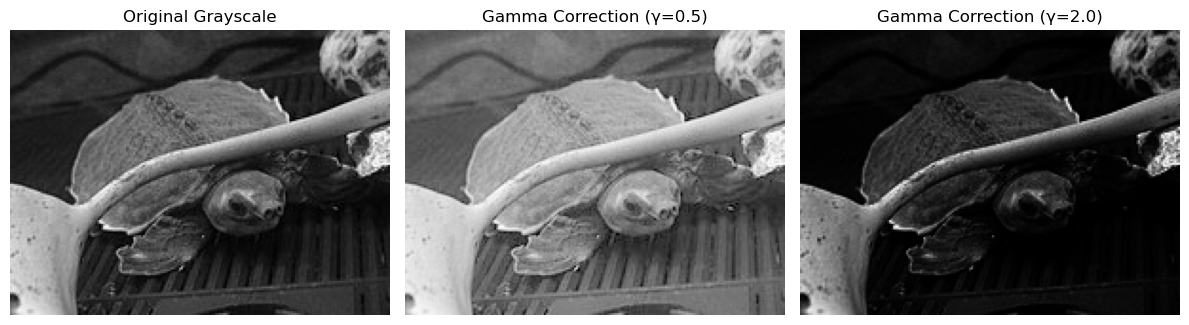

In [10]:
normalized_img = gray_image / 255.0

gamma_low = 0.5   # Brightens
gamma_high = 2.0  # Darkens

gamma_corrected_low = np.power(normalized_img, gamma_low) * 255
gamma_corrected_high = np.power(normalized_img, gamma_high) * 255

gamma_corrected_low = np.array(gamma_corrected_low, dtype=np.uint8)
gamma_corrected_high = np.array(gamma_corrected_high, dtype=np.uint8)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gamma_corrected_low, cmap='gray')
plt.title("Gamma Correction (γ=0.5)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gamma_corrected_high, cmap='gray')
plt.title("Gamma Correction (γ=2.0)")
plt.axis('off')

plt.tight_layout()
plt.show()

##### Contrast Stretching with defined min/max intensity values.

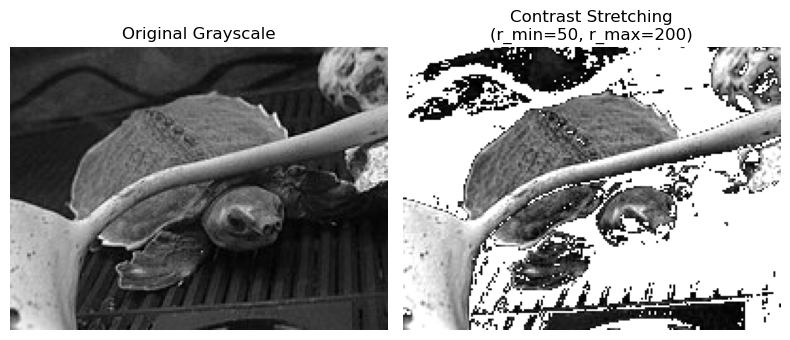

In [11]:
r_min, r_max = 50, 200

contrast_stretched = (gray_image - r_min) * (255 / (r_max - r_min))
contrast_stretched = np.clip(contrast_stretched, 0, 255).astype(np.uint8)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contrast_stretched, cmap='gray')
plt.title(f"Contrast Stretching\n(r_min={r_min}, r_max={r_max})")
plt.axis('off')

plt.tight_layout()
plt.show()

##### Equalize each RGB channel separately.

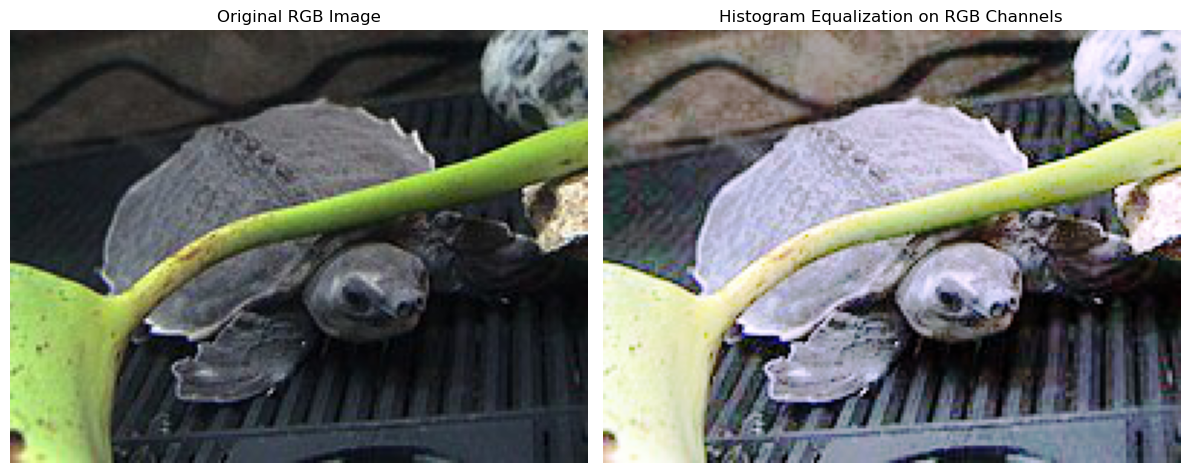

In [12]:
img_rgb = np.array(image)
r, g, b = cv2.split(img_rgb)

r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

img_rgb_eq = cv2.merge((r_eq, g_eq, b_eq))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_rgb_eq)
plt.title("Histogram Equalization on RGB Channels")
plt.axis('off')

plt.tight_layout()
plt.show()

##### Equalize the luminance channel in YCrCb or LAB space while preserving colors.

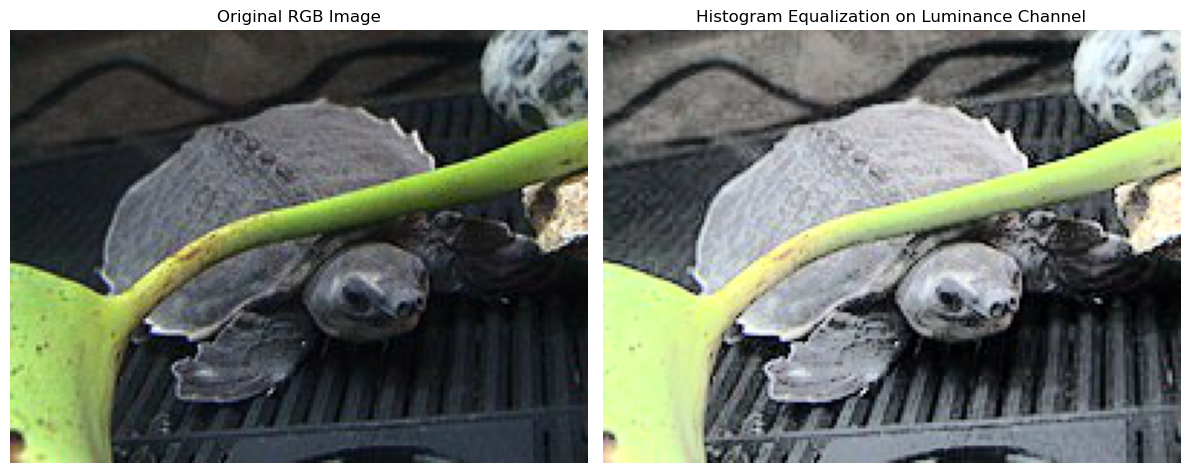

In [13]:
img_ycrcb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
y, cr, cb = cv2.split(img_ycrcb)
y_eq = cv2.equalizeHist(y)

img_ycrcb_eq = cv2.merge((y_eq, cr, cb))
img_ycrcb_eq_rgb = cv2.cvtColor(img_ycrcb_eq, cv2.COLOR_YCrCb2RGB)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_ycrcb_eq_rgb)
plt.title("Histogram Equalization on Luminance Channel")
plt.axis('off')

plt.tight_layout()
plt.show()

##### Convert to grayscale and apply Otsu’s thresholding.

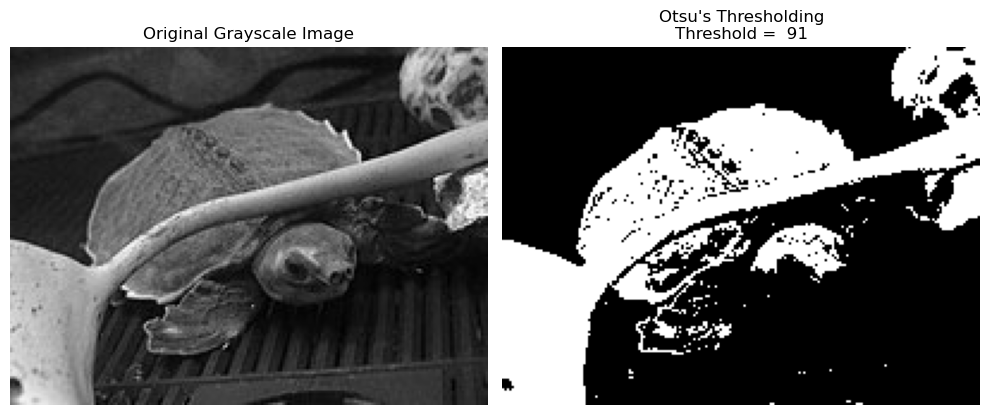

In [14]:
gray_image = np.array(image.convert('L'))
_, otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title(f"Otsu's Thresholding\nThreshold = {_: .0f}")
plt.axis('off')

plt.tight_layout()
plt.show()

##### Apply adaptive thresholding and compare results.

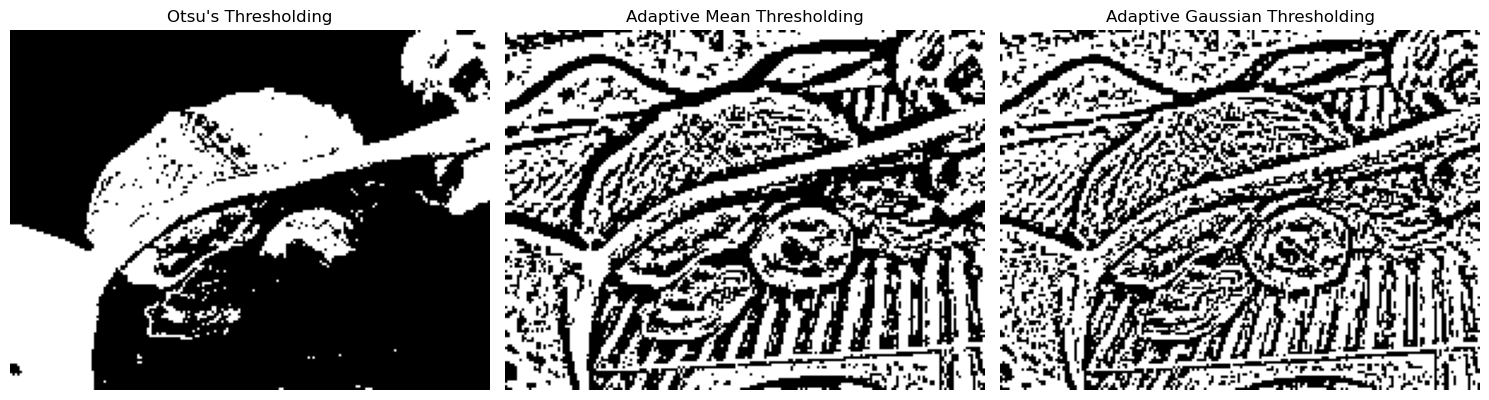

In [15]:
adaptive_mean = cv2.adaptiveThreshold(
    gray_image, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    blockSize=11,
    C=2
)

adaptive_gauss = cv2.adaptiveThreshold(
    gray_image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    blockSize=11,
    C=2
)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(adaptive_mean, cmap='gray')
plt.title("Adaptive Mean Thresholding")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(adaptive_gauss, cmap='gray')
plt.title("Adaptive Gaussian Thresholding")
plt.axis('off')

plt.tight_layout()
plt.show()

##### 6. Visualization Layout
##### Show original vs transformed images side-by-side.
##### Show histograms before and after transformations.
#### Arrange results in a multi-row subplot for easy comparison.

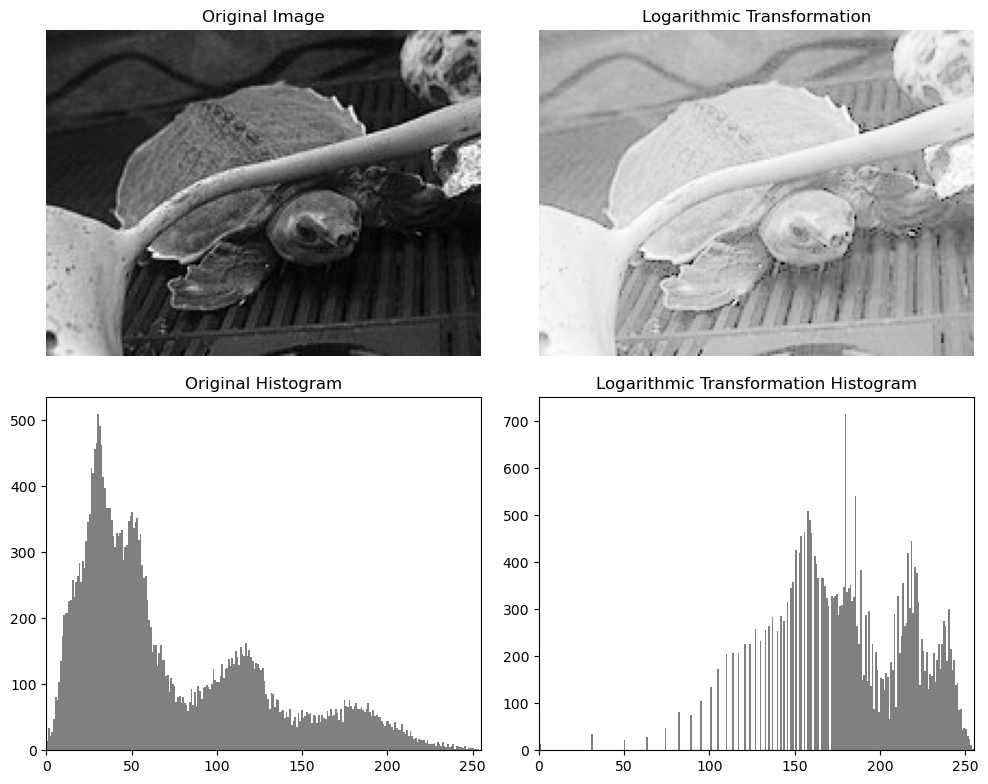

In [16]:
def show_images_and_histograms(original, transformed, title_transformed):
    plt.figure(figsize=(10, 8))
    
    # Images
    plt.subplot(2, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    plt.imshow(transformed, cmap='gray')
    plt.title(title_transformed)
    plt.axis('off')
    
    # Histograms
    plt.subplot(2, 2, 3)
    plt.hist(np.array(original).ravel(), bins=256, range=(0,255), color='gray')
    plt.title("Original Histogram")
    plt.xlim([0, 255])
    
    plt.subplot(2, 2, 4)
    plt.hist(np.array(transformed).ravel(), bins=256, range=(0,255), color='gray')
    plt.title(f"{title_transformed} Histogram")
    plt.xlim([0, 255])
    
    plt.tight_layout()
    plt.show()

show_images_and_histograms(gray_image, log_transformed, "Logarithmic Transformation")